In [ ]:
# Homework 6
## Ziyan Hu

Use publicly available data from AirBnB to make 5 original paper quality figures with
captions using python. You may use packages numpy, pandas, matplotlib, seaborn, etc. You
can pick any city for this analysis — please only pick one city. Requirements for the figures:
1. Use at least five distinct plot types (i.e. individual/joint distributions, pairwise relationships, etc.)
2. At least two figures should use a change of color from the default matplotlib or seaborn
colors
3. At least one figure should use ’pd.merge’ to join two of the dataframes together
4. All plots should have a title, axis labels, and legend titles
5. Variable names are not acceptable for axis labels and legend labels
6. Figure captions should be three to five sentences and describe the figure and trends in
the data

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
listings = pd.read_csv('nyclistings.csv')
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.29,3,351,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,2019-12-02,0.29,2,151,0,NaN
2,6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,2023-08-14,1.09,1,79,5,NaN
3,6872,Condo in New York · 1 bedroom · 1 bed · 1 shar...,16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65,30,1,2022-06-05,0.06,2,295,0,NaN
4,7064,Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...,17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,95,30,13,2022-09-12,0.08,2,26,0,NaN


In [4]:
reviews = pd.read_csv('nycreviews.csv.gz',
                      compression='gzip')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


## Plot 1
### Individual Distribution

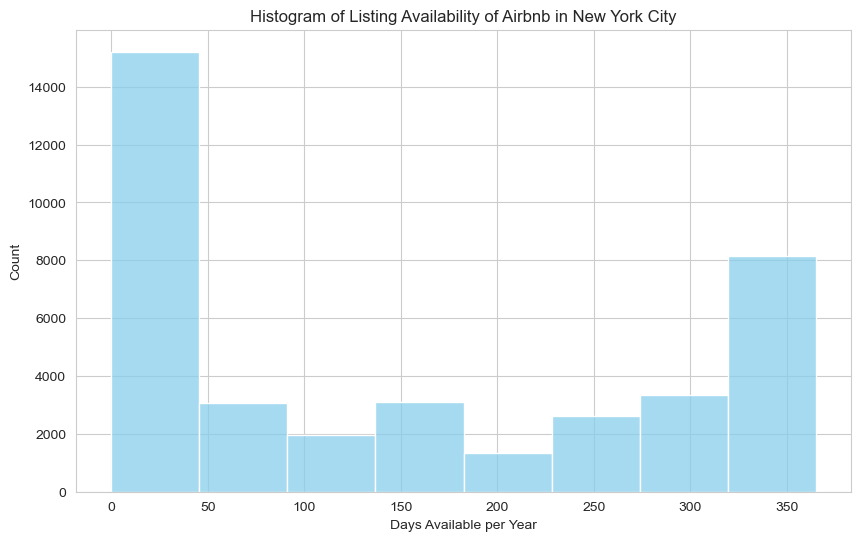

In [5]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the histogram with 8 bins and skyblue color
sns.histplot(listings['availability_365'], bins=8, color='skyblue')

# Add a title and labels to the axes
plt.title('Histogram of Listing Availability of Airbnb in New York City')
plt.xlabel('Days Available per Year')
plt.ylabel('Count')

# Display the plot
plt.show()


This histogram provides a visual representation of the number of days Airbnb listings in New York City are available throughout the year. The majority of listings show high availability, clustering towards the right side of the plot, indicating that they are open for most of the year. However, there's noticeable variability, with some listings only available for a few days, likely due to personal use or regulatory restrictions. The spread across the plot highlights the diverse range of hosting patterns in the city's vibrant short-term rental market.

## Plot 2
### pairwise relationships

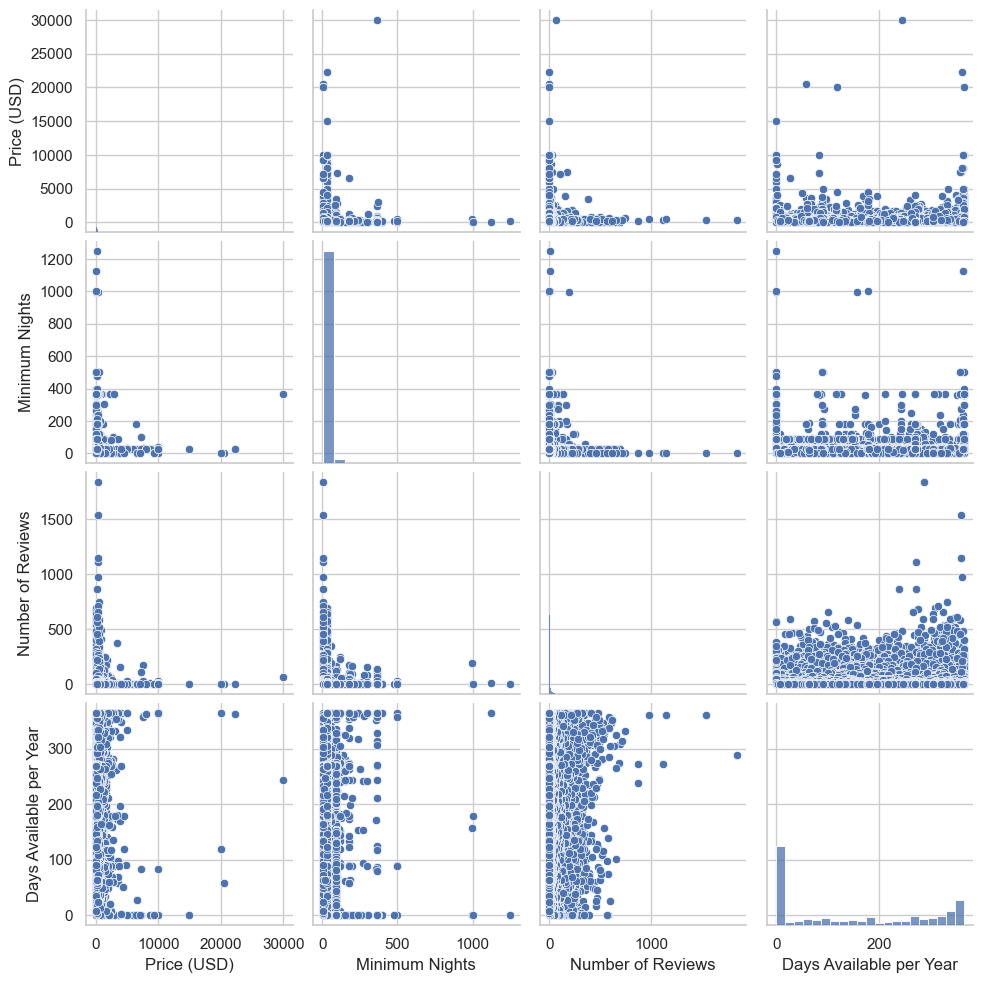

In [19]:
# Selecting a subset of the dataset with numerical variables
numerical_data = listings[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

# Creating the pair plot
pair_plot = sns.pairplot(numerical_data)

# Relabeling the axes with more descriptive labels
labels = ['Price (USD)', 'Minimum Nights', 'Number of Reviews', 'Days Available per Year']
for i in range(len(labels)):
    pair_plot.axes[i, 0].set_ylabel(labels[i])  # y-axis labels
    pair_plot.axes[-1, i].set_xlabel(labels[i])  # x-axis labels

plt.show()

The pair plot provides a comprehensive visualization of the pairwise relationships between price, minimum nights, number of reviews, and availability per year for Airbnb listings in New York City. Each scatterplot in the matrix shows the relationship between two variables, while the diagonal plots show the distribution of each individual variable. This visualization helps identify patterns and correlations between different aspects of the listings.

## Plot 3
### Categorical Comparison

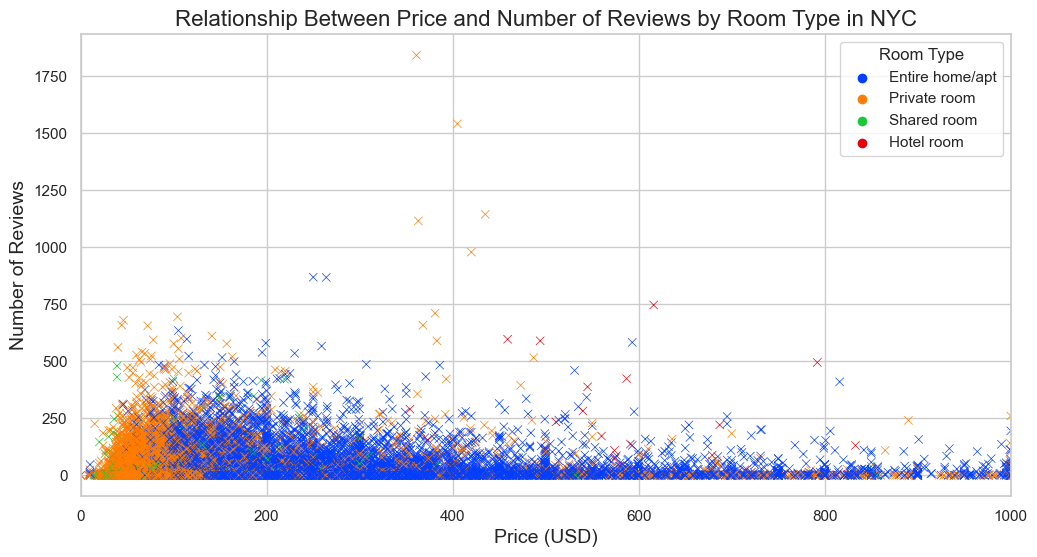

In [24]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a scatter plot using seaborn
sns.scatterplot(data=listings, x='price', y='number_of_reviews', hue='room_type', palette='bright',marker ='x')
plt.title('Relationship Between Price and Number of Reviews by Room Type in NYC', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.legend(title='Room Type')
plt.xlim(0, 1000)  # Limiting x-axis for better readability as most prices are below $1000

# Show plot
plt.show()


The scatter plot above visualizes the relationship between the price of listings and the number of reviews they have received, with different room types distinguished by color. It seems that most reviews are concentrated on listings that are priced below $250, regardless of the room type. There is also a noticeable cluster of listings with a high number of reviews in the lower price range, which might indicate a preference for more affordable options among users. The use of a bright color palette differentiates room types clearly and adds visual interest to the plot. Prices are again capped at $1000 to focus on the bulk of the data.

## Plot 4
### Heatmap (Correlation Matrix)

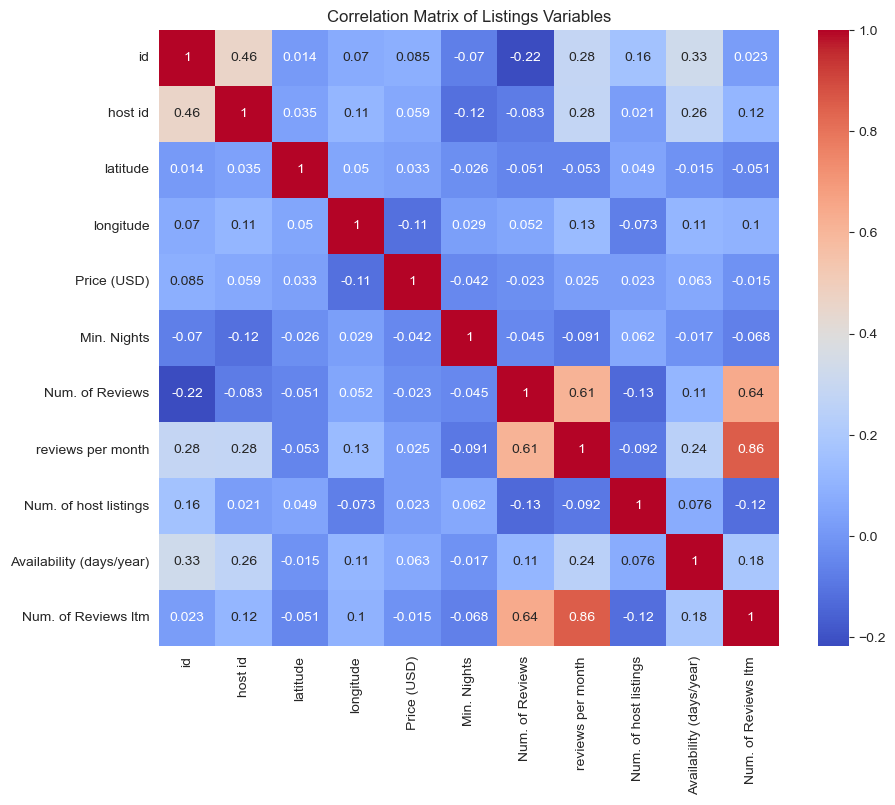

In [11]:
listings_renamed = listings.rename(columns={
    'price': 'Price (USD)',
    'minimum_nights': 'Min. Nights',
    'number_of_reviews': 'Num. of Reviews',
    'availability_365': 'Availability (days/year)',
    'reviews_per_month': 'Reviews per month',
    'calculated_host_listings_count':'Num. of host listings',
    'host_id':'Host id',
    'number_of_reviews_ltm':'Num. of Reviews ltm'
})

# Calculate the correlation matrix
corr = listings_renamed.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Listings Variables')
plt.show()


The heatmap illustrates the correlation matrix of numerical variables in the listings dataset. Strong positive correlations are indicated by darker red colors, while strong negative correlations are shown in darker blue colors. This visualization helps identify which variables have strong relationships and might influence each other. it reveals no significant correlation between geographical location (latitude and longitude) and price, implying that other factors may be more influential in determining listing prices. The data also suggests a slight positive correlation between the number of host listings and the availability of those listings, which could indicate that hosts with multiple properties might offer more booking opportunities.

## Plot 5
### Merge 2 data frames

In [12]:
# merging the dataframes on 'id' and 'listing_id'
merged_df = pd.merge(listings,reviews, left_on='id', right_on='listing_id', how='left')
merged_df['date'] = pd.to_datetime(merged_df['date'])

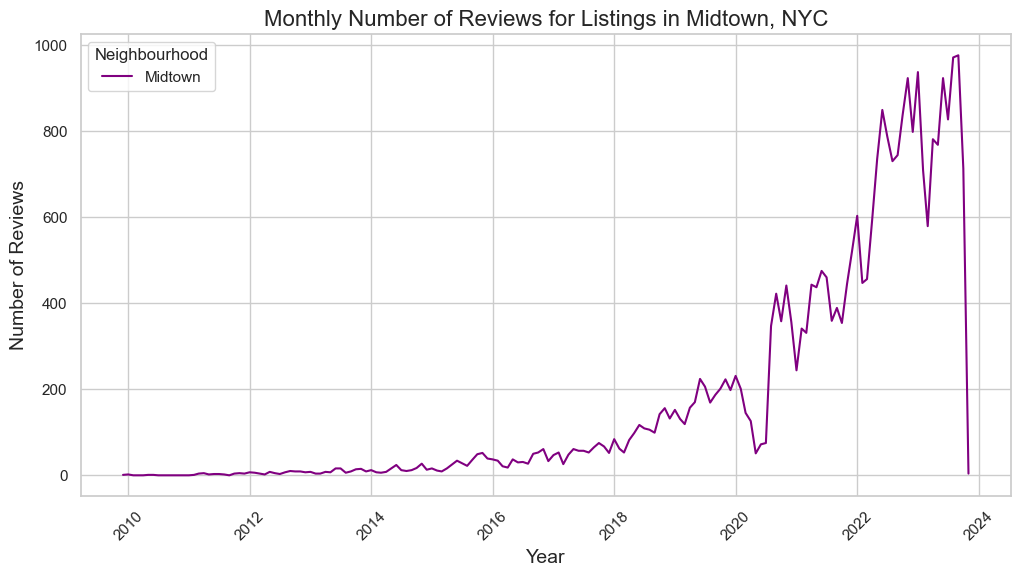

In [13]:
# set style for seaborn
sns.set(style="whitegrid")

# create a time series plot for listings in the 'Midtown' neighborhood
midtown_data = merged_df[merged_df['neighbourhood'] == 'Midtown']

# resample the data to get a monthly count of reviews
monthly_reviews = midtown_data.set_index('date').resample('M').size()

# create the time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_reviews, color='purple')
plt.title('Monthly Number of Reviews for Listings in Midtown, NYC', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.legend(title='Neighbourhood', labels=['Midtown'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# show plot
plt.show()


This time series plot illustrates the monthly number of reviews for listings in the Midtown neighborhood of New York City. The data indicates fluctuations in review frequency over time, with some peaks that might correspond to popular travel times or local events. The trend line is displayed in purple to deviate from the default matplotlib colors, providing a clear visual of the data trends. The x-axis represents the year, and the y-axis shows the number of reviews received each month. The plot includes a legend indicating that the data is for the Midtown neighborhood.

